In [0]:
import pandas as pd

In [0]:
tweets_data = pd.read_csv('NoLimit-EN.csv')

In [110]:
tweets_data.head()

,text,English
0,gsxr,gsxr
1,daihatsu sirion kuisdaihatsu daihatsusahabatku...,Daihatsu Sirion kuisdaihatsu daihatsusahabatku...
2,Satria Suzukiquiz Kuy followup Gaes at Suzuki ...,Satria Suzukiquiz Kuy followup gaes at Suzuki ...
3,satria suzukiquiz berjalan ke atas rotan liat ...,knight suzukiquiz walk up to dry his underwate...
4,satria suzuqiquiz satria armanih,suzuqiquiz noble knight armanih


In [111]:
print(len(tweets_data))

13532


In [112]:
tweets_data.dropna(axis = 0, how = "any", inplace = True)
tweets_data.isnull().sum()

text       0
English    0
dtype: int64

In [113]:
print (len(tweets_data))

12928


In [0]:
tweets_data.drop_duplicates(inplace=True)

In [115]:
print (len(tweets_data))

10666


In [116]:
import re
def word_in_text(word, English):
    try:
        English = English.lower()
        match = re.search(word, English)
        if match:
            return True
        return False
    except AttributeError:
        return False
print(word_in_text('hello','Hi there maybe, I would say hello instead'))

True


In [117]:
from textblob import TextBlob
# Sample of using TextBlob sentiment
print (TextBlob("This food is good").polarity)
print (TextBlob("This food is bad").polarity)
print (TextBlob("This food is very good").polarity)
print (TextBlob("This food is very bad").polarity)
print (TextBlob("This food is not very good").polarity)
print (TextBlob("This food is very not good").polarity)

0.7
-0.6999999999999998
0.9099999999999999
-0.9099999999999998
-0.26923076923076916
-0.07499999999999998


In [118]:
type(tweets_data['English'])

pandas.core.series.Series

In [0]:
# Importing TextBlob from textblob to find polarity
from textblob import TextBlob

def find_polarity(tweet):
    try:
        textblob_tweet = TextBlob(tweet)
        return textblob_tweet.polarity
    except:
        pass
    
def find_subjectivity(tweet):
    try:
        textblob_tweet = TextBlob(tweet)
        return textblob_tweet.subjectivity
    except:
        pass

In [120]:
# Applying textblob to each tweets text
tweets_data['polarity'] = tweets_data['English'].apply(lambda tweet:find_polarity(tweet))
tweets_data['subjectivity'] = tweets_data['English'].apply(lambda tweet:find_subjectivity(tweet))
tweets_data.head()

,text,English,polarity,subjectivity
0,gsxr,gsxr,0.000000,0.000000
1,daihatsu sirion kuisdaihatsu daihatsusahabatku...,Daihatsu Sirion kuisdaihatsu daihatsusahabatku...,0.000000,0.000000
2,Satria Suzukiquiz Kuy followup Gaes at Suzuki ...,Satria Suzukiquiz Kuy followup gaes at Suzuki ...,0.000000,0.000000
3,satria suzukiquiz berjalan ke atas rotan liat ...,knight suzukiquiz walk up to dry his underwate...,0.255556,0.677778
4,satria suzuqiquiz satria armanih,suzuqiquiz noble knight armanih,0.600000,0.900000


In [121]:
# Let's do a check on polarity texts
tweets_data.sort_values('polarity',ascending=True).head()

,text,English,polarity,subjectivity
9472,pickup was very worst,pickup was very worst,-1.0,1.0
4186,booking fee cuman juta masa gila,booking fee cuman million times insane,-1.0,1.0
11619,semoga segera punya mobil impian sprti ini,hopefully soon have this bleak dream car,-1.0,1.0
3417,any car but not maruti suzuki india they are w...,any car but not maruti suzuki india worst qual...,-1.0,1.0
7657,leftover roundabout hero clips those sliders a...,Reviews those leftover clips roundabout hero s...,-1.0,1.0


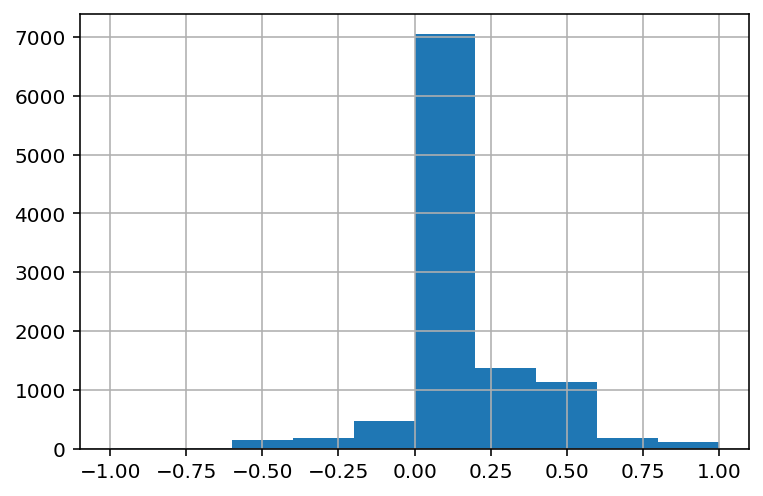

In [122]:
tweets_data.polarity.hist()

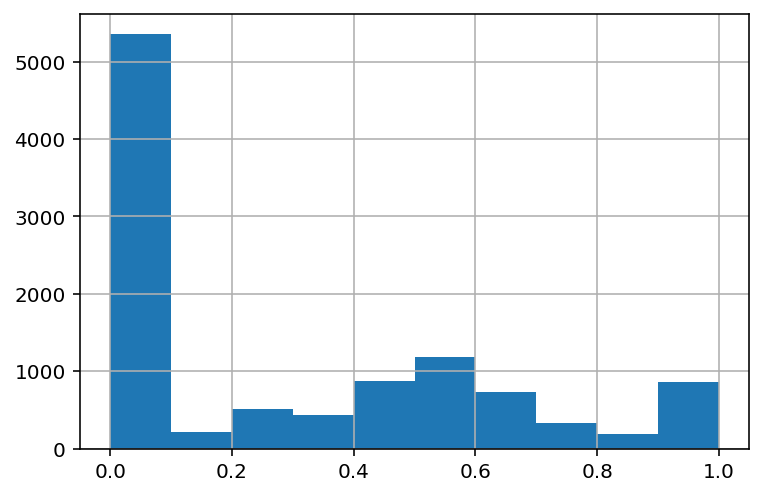

In [123]:
tweets_data.subjectivity.hist()

In [0]:
# Determining if they a comment is satisfied or not satisfied (split by range)
tweets_data['polaritytext'] =  pd.cut(tweets_data.polarity, 3,labels=["unhappy","neutral","happy"])
tweets_data['subjectivitytext'] =  pd.cut(tweets_data.subjectivity, 2,labels=["meaningful","subjective"])

In [126]:
# Let's do a check on polarity texts
tweets_data.sort_values('polaritytext',ascending=False).head()

,text,English,polarity,subjectivity,polaritytext,subjectivitytext
6735,jawaban nya satria suzukiquiz deis eka fara mu...,Her answer noble suzukiquiz deist fara eka mut...,0.600,0.900,happy,subjective
10939,satria suzukiquiz mss bean boby rani cool rani...,mss suzukiquiz noble bean boby rani rani Agast...,0.475,0.775,happy,subjective
10949,satria nugroho r suzukiquiz,nugroho noble r suzukiquiz,0.600,0.900,happy,subjective
10947,satria suzuqiquiz satria yuk ikutan yaddi july...,suzuqiquiz noble knight yuk follow yaddi julyo...,0.650,0.750,happy,subjective
10946,satria suzukiquiz suzukiindonesiamotor nyalaks...,suzukiquiz noble suzukiindonesiamotor nyalaksn...,0.600,0.900,happy,subjective


In [127]:
#Summary of the dataset
tweets_data.describe()

,polarity,subjectivity
count,10666.000000,10666.000000
mean,0.118122,0.282577
std,0.233794,0.326555
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.066667
75%,0.225000,0.533333
max,1.000000,1.000000


In [128]:
tweets_data['polaritytext'].value_counts()

neutral    8531
happy      1953
unhappy     182
Name: polaritytext, dtype: int64

In [0]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

split the training dataset

In [130]:
train_reviews=tweets_data.English[:7466]
train_sentiments=tweets_data.polaritytext[:7466]
test_reviews=tweets_data.English[7466:]
test_sentiments=tweets_data.polaritytext[7466:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(7466,) (7466,)
(3200,) (3200,)


In [0]:
#Tokenization of text
tokenizer=ToktokTokenizer()

In [0]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
tweets_data['English']=tweets_data['English'].apply(denoise_text)

In [0]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
tweets_data['English']=tweets_data['English'].apply(remove_special_characters)

In [0]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
tweets_data['English']=tweets_data['English'].apply(simple_stemmer)

In [135]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stopword_list=nltk.corpus.stopwords.words('english')

In [137]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
tweets_data['English']=tweets_data['English'].apply(remove_stopwords)

{'they', 'not', 'those', "isn't", 'her', 'do', 'then', "you'd", 'hasn', 'himself', 'same', 'needn', 'couldn', 'ma', 'a', 'because', 'been', 'had', 'having', 'some', 'just', 'didn', 'your', 'against', 'but', 's', 'hers', 'own', 'this', 'being', 'or', 'while', 'was', 'will', 'aren', 'hadn', 'most', "hasn't", 'and', 'yours', 'once', 'where', 'few', 'such', 'nor', "couldn't", 'very', 'out', "she's", "wouldn't", 'the', 'by', 'don', 'its', 'mightn', 'who', 'does', 'down', 'whom', 'ours', 'o', 'ain', 'in', 'more', 'if', 'through', 'why', 'she', 'after', 'below', 'them', "mustn't", "shouldn't", 'is', 'with', 'i', 'were', 'these', 'off', 'be', 'yourselves', "don't", 'too', 'until', 'did', 'now', 'herself', "weren't", 'itself', 'themselves', 'wouldn', 'are', 'of', 'y', 've', "hadn't", 'my', 'other', "wasn't", 'each', "should've", 'so', 'doing', 'myself', "mightn't", "you're", 'his', 'both', 'theirs', 'am', 'mustn', 'their', 'any', 'over', "you'll", 'doesn', 'll', 'him', "it's", 'it', "you've", '

In [138]:
norm_train_reviews=tweets_data.English[:7466]
print(len(norm_train_reviews))

7466


In [139]:
norm_test_reviews=tweets_data.English[7466:]
print(len(norm_test_reviews))

3200


#Bag Of Word Model

In [140]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (7466, 117364)
BOW_cv_test: (3200, 117364)


#Term Frequency-Inverse Document Frequency model (TFIDF)

In [141]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (7466, 117364)
Tfidf_test: (3200, 117364)


#Labeling the sentiment text

In [0]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(tweets_data['polaritytext'])

In [143]:
print(len(train_sentiments))
print(len(test_sentiments))

7466
3200


#Logistic Regression

In [145]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [146]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'neutral']
['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'neutral']


In [147]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.758125
lr_tfidf_score : 0.75125


#Stochastic gradient descent or Linear support vector machines (SVM) for bag of words and tfidf features

In [148]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [149]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'neutral']
['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'neutral']


In [150]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.7575
svm_tfidf_score : 0.7584375


#Multinomial Naive Bayes for bag of words and tfidf features

In [151]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [152]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'neutral']
['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'neutral']


In [153]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.756875
mnb_tfidf_score : 0.7521875


In [0]:
# tweets = pd.DataFrame(tweets_data)
# tweets.to_csv('tweets_eda.csv', encoding = 'utf-8')

#Topic Extraction

In [154]:
for word in ['(?i)RT','(?i)di','(?i)https','(?i)yg','(?i)yang','(?i)ta','(?i)pak','(?i)ibu','(?i)sya','(?i)saya',
             '(?i)dan','(?i)ko','(?i)dari','(?i)kepada']:
    tweets_data.text = tweets_data.text.str.replace(word,'',regex=True)
tweets_data['text'].head()

0                                                 gsxr
1    daihatsu sirion kuisdaihatsu daihatsusahabatku...
2    Satria Suzukiquiz Kuy followup Gaes at Suzuki ...
3    satria suzukiquiz berjalan ke as ron liat bawa...
4                     satria suzuqiquiz satria armanih
Name: text, dtype: object

In [155]:
# Importing necessary model values
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Getting the X_train
X_train = tweets_data.text
# print(X_train.head())

# tokenize and vectorize the words inside the list of documents/tweets
vectorizer = CountVectorizer(stop_words='english')
X_train_dtm = vectorizer.fit_transform(X_train)
vocab = np.array(vectorizer.get_feature_names())

print(X_train_dtm.shape)
print(len(vocab))

(10666, 23700)
23700


In [156]:
X_train.size

10666

In [157]:
# Using sklearn library to get the necessary LDA model
from sklearn import decomposition

num_topics = 8
num_top_words = 8
clf = decomposition.NMF(n_components=num_topics, random_state=1)

# this next step may take some time to train depending on the texts you have
doctopic = clf.fit_transform(X_train_dtm)
print(doctopic.shape)
print(clf.components_.shape)

(10666, 8)
(8, 23700)


In [158]:
clf.components_

array([[0.00000000e+00, 4.28905365e-04, 0.00000000e+00, ...,
        1.36046945e-07, 0.00000000e+00, 0.00000000e+00],
       [9.27739206e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.25015139e-05],
       [5.07838239e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00940549e-02, 1.10597997e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.41779434e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.74480138e-03, 0.00000000e+00, 5.69896815e-04, ...,
        2.65818991e-07, 2.37296314e-04, 1.30843256e-04]])

In [0]:
# Getting the dominant topic for each word
topic_words = []

# Appending top important vocabset list onto topic_words list
for topic in clf.components_:
#     npargsort gets the index based on the order, [::-1] order it descending and finally num_top_words will filter it
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])

In [160]:
import matplotlib.pyplot as plt

# Making DataFrame that gets the doctopic (values of topics for each text)
dftopic = pd.DataFrame(doctopic,columns=topic_words)
dftopicinv=dftopic.T

# Getting the dominant topic
topic_series = []
for i in np.arange(dftopic.shape[0]):
    topic_series.append(dftopicinv[i].argmax())

dftopic['dominanttopic'] = topic_series
tweets_data['dominanttopic'] = topic_series

print(dftopic.shape)
print(tweets_data.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  # Remove the CWD from sys.path while we load stuff.


(10666, 9)
(10666, 7)


(covers, ams, repost, terbesar, suzuki, promo, brio, motor)            6788
(mofied, unit, fff, jaya, suzukigsxr, ignis, jam, dengan)              1027
(baleno, motor, cbr, yamaha, gsxr, suzuki, kami, ini)                   798
(car, ninja, hondacbr, sakti, mofikasi, eiga, eiga, ada)                543
(mofication, aris, ninja, maram, gsx, dp, anda, mobil)                  469
(maruti, mesin, sunmori, terpercaya, indo, kret, driver, indonesia)     450
(suzuki, ki, rr, terbaik, id, new, mobil, bisa)                         298
(seat, spo, yamahar, mio, indonesia, jt, sewa, untuk)                   293
Name: dominanttopic, dtype: int64


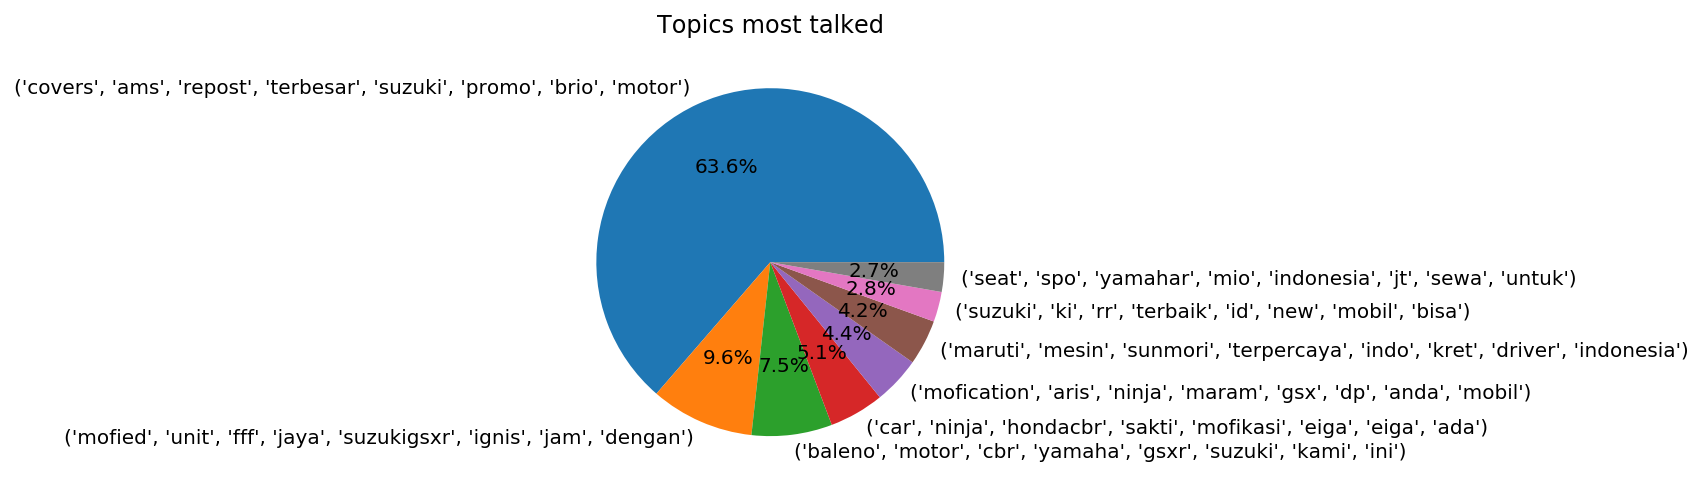

In [161]:
# Getting top dominant topics and count them
topic_count =tweets_data.dominanttopic.value_counts()
print(topic_count)

# Visualizing dominant topics count

#The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
plt.axis("equal") 

#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(topic_count.values,labels=topic_count.index,autopct="%1.1f%%") 
plt.title("Topics most talked")
plt.show()